In [1]:
# Kristina Fauss
# April 19, 2024
# model selection by AIC testing all 1st order interactions

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import statsmodels.formula.api as smf

from ols_mixedef_custom import *

In [2]:
fp = '/Users/kristinafauss/BackupToBox/Git/lab-flammability-testing-2022/data/processed-data/main_dataset.csv'

flamog = pd.read_csv(fp)

# drop na's for flam metrics
print(len(flamog))
for col in ['fh', 'fd', 'pfg', 'temp_change', 'heat_flux_change']:
    flamog.dropna(subset=col, inplace=True)
print(len(flamog))

flamog['plant_id']=[str(a)+'_'+str(b) for a,b in zip(flamog['plant'], flamog['species'])]

# report
print(flamog.columns)
flamog.head()

172
171
Index(['Unnamed: 0', 'species', 'plant', 'date', 'total_branch_mass',
       'total_leaf_mass', 'stem_mass_ratio', 'leaf_mass_ratio', 'leaf_lfm',
       'thickness', 'leaf_wet_mass', 'leaf_dry_mass', 'stem_lfm', 'stem_width',
       'stem_wet_mass', 'stem_dry_mass', 'stem_sav', 'lfm', 'leaf_dmc',
       'stem_dmc', 'dmc', 'leaf_area', 'leaf_sav', 'LMA', 'SLA', 'rep',
       'branch_length', 'branch_width', 'branch_height', 'sample_wt',
       'no_branches', 'mpa', 'notes_on_plant_char', 'start_time',
       'ambient_temp', 'ambient_humidity', 'pre_ignition_glow',
       'first_glow_time', 'ignition', 'primary_ignition',
       'primary_time_of_flame_end', 'secondary_ignition',
       'secondary_time_of_flame_end', 'third_ignition',
       'third_time_of_ignition_flame_end', 'time_fh', 'fh', 'time_of_glow_end',
       'end_time', 'thermocoupler_height', 'hotplate_height',
       'notes_on_flam_data', 'fd', 'tti', 'pfg', 'max_temp',
       'time_at_max_temp', 'max_temp_sensor', '

,Unnamed: 0,species,plant,date,total_branch_mass,total_leaf_mass,stem_mass_ratio,leaf_mass_ratio,leaf_lfm,thickness,...,wet_mass,dry_mass,gdw_gfw,dw_flam_sample,ww_flam_sample,branch_volume,branching,sample_density,dw_sppdev,plant_id
0,1,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,1.291195,4.035205,1082.04,0.416667,0.004923,0.923122,1_ARCDEN
1,2,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,1.429372,4.467028,1370.20,0.322581,0.004303,1.348152,1_ARCDEN
2,3,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,1.283923,4.012477,682.04,0.294118,0.007766,0.900752,1_ARCDEN
3,4,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,1.283923,4.012477,1262.25,0.466667,0.004196,0.900752,1_ARCDEN
4,5,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,0.811215,2.535185,819.00,0.500000,0.004086,-0.553297,1_ARCDEN


In [3]:
model = smf.mixedlm("fh ~ total_branch_mass + species", data=flamog, groups=flamog["plant_id"])
results = model.fit(reml=False)
results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:               MixedLM   Dependent Variable:   fh       
No. Observations:    171       Method:               ML       
No. Groups:          58        Scale:                51.4006  
Min. group size:     1         Log-Likelihood:       -610.5181
Max. group size:     11        Converged:            Yes      
Mean group size:     2.9                                      
--------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------
Intercept           1.807    8.316  0.217 0.828 -14.492 18.106
species[T.ARTCAL]  -1.429    5.410 -0.264 0.792 -12.032  9.174
species[T.CEAGRI]   6.016    5.222  1.152 0.249  -4.219 16.250
species[T.ERIKAR] -12.658    5.016 -2.524 0.012 -22.489 -2.828
species[T.HETARB]  11.932    5.969  1.999 0.046   0.234 23.630
species[T.MALLAU]  -2.647    5.945 -0.445 0.656 -14.299  9.006
species[T.SALAPI]   0.198    5.375  0.037 0.971 -10.336 10.732
species[T.SALLEU]  -2.810    5.085 -0.553 0.581 -12.777  7.157
total_branch_mass   1.146    0.360  3.181 0.001   0.440  1.852
Group Var          38.508    2.421                            
==============================================================

"""

In [4]:
results.aic

1243.0361180203022

# Examine Correlation & Structure in Num. Var's

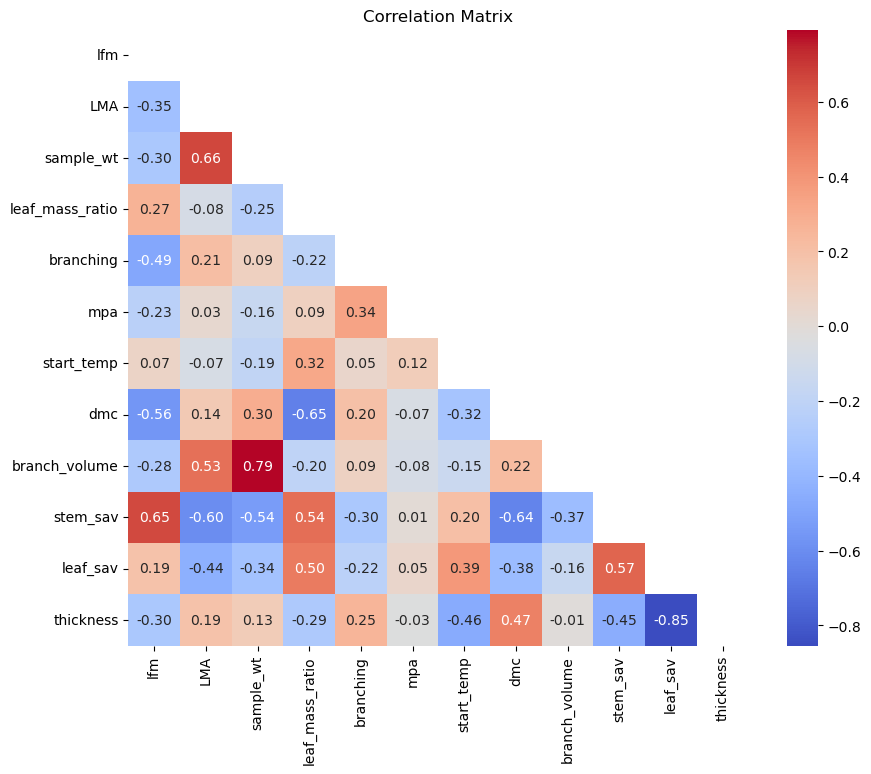

In [5]:
cols_num_use = ['lfm', 'LMA', 'sample_wt', 'leaf_mass_ratio', 'branching', 'mpa', 'start_temp', 'dmc', 'branch_volume', 'stem_sav', 'leaf_sav', 'thickness']

corrplot(flamog, cols_num_use)

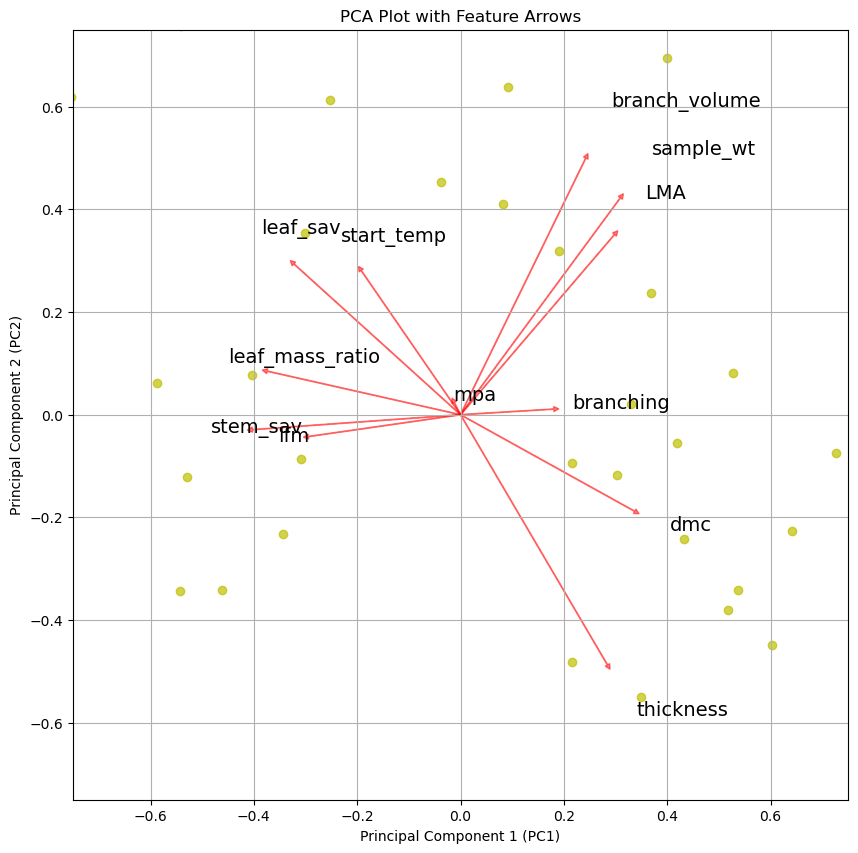

In [6]:
PCAplot(flamog, cols_num_use)

# Run Model Selector

### NOTE: Random effect is simply `plant_id`
- NO nested effects
- NO `species'

In [1]:
# PROCESS ALL DATA

# scale and center
cols_all = ['fh', 'fd', 'temp_change', 'heat_flux_change'] + cols_num_use
flam = scale_and_center(flamog, cols_all, cols_no_change=['plant_id', 'species', 'ignition'])

# declare as factors
flam['species'] = pd.Categorical(flam['species'])
flam['plant_id'] = pd.Categorical(flam['plant_id'])
flam['ignition'] = pd.Categorical(flam['ignition'])

# drop na's
print(len(flam))
cols_all_dpna = cols_all + ['plant_id', 'species', 'ignition']
flam.dropna(subset=cols_all_dpna, inplace=True)
print(len(flam))

# declare all IV cols to model
cols_use = cols_num_use + ['species']
print(cols_use)

NameError: name 'cols_num_use' is not defined

In [ ]:
# examine top models - ALL
df = flam
cols = cols_use
dv = 'fh'

# collect all possible formulas
formulas, form_cols = all_formulas_2way_interactions_and_singletons(cols, y=dv, report=0)
# evaluate all models using AIC, present top models
resdf, num_top_models = AICscore_from_all_pos_2way_interactions(df, formulas, form_cols)

for idx,row in resdf[0:num_top_models].iterrows():
    formula = row.Formula
    cols = row.form_cols
    model = smf.ols(formula, data=df)
    results = model.fit()
    print(results.summary())
    plot_ols_coefficients(results)
    cols.remove('species')
    plot_resid(df, cols, results)